# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,5.192901,6.239129,6.557870
1,5.728902,6.025710,6.718670
2,2.068149,5.186407,5.620445
3,0.118613,5.116865,5.035584
4,0.215681,4.317799,5.064704


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

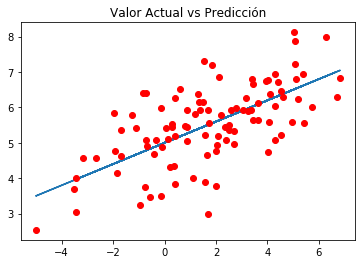

In [16]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
#plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [57]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [58]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,4.170127,8.774666,6.251038,0.483482,6.368697,10.361682
1,3.191858,4.866337,5.957557,0.161482,1.190762,0.475235
2,-0.242036,4.622468,4.927389,0.394786,0.092977,0.870939
3,3.355509,5.792907,6.006653,0.203350,0.045687,0.056263
4,2.053049,6.914448,5.615915,0.003625,1.686189,1.846171


In [59]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [60]:
SSR

57.061592495357665

In [61]:
SSD

64.62912938200402

In [62]:
SST

118.76326975838883

In [63]:
SSR+SSD

121.69072187736168

In [64]:
R2 = SSR/SST

In [65]:
R2

0.48046498392510895

(array([ 2.,  2.,  4., 12., 12., 22., 19., 16.,  7.,  4.]),
 array([-2.52362778, -2.10919908, -1.69477037, -1.28034166, -0.86591295,
        -0.45148424, -0.03705553,  0.37737318,  0.79180189,  1.2062306 ,
         1.62065931]),
 <a list of 10 Patch objects>)

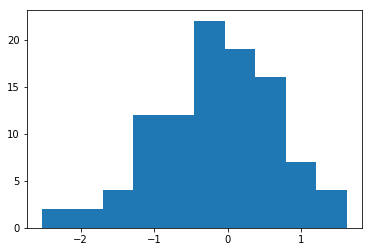

In [66]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [67]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.3766343542248387, 5.555709335564895)

In [68]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [69]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [70]:
alpha = y_mean - beta * x_mean

In [71]:
alpha, beta

(5.138417257827989, 0.3031248468093598)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [72]:
data["y_model"] = alpha + beta * data["x"]

In [73]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,4.170127,8.774666,6.251038,0.483482,6.368697,10.361682,8.992132,7.803602,6.402486
1,3.191858,4.866337,5.957557,0.161482,1.190762,0.475235,-1.251365,3.295037,6.105949
2,-0.242036,4.622468,4.927389,0.394786,0.092977,0.870939,1.510609,2.620093,5.065050
3,3.355509,5.792907,6.006653,0.203350,0.045687,0.056263,0.469384,3.915943,6.155555
4,2.053049,6.914448,5.615915,0.003625,1.686189,1.846171,0.919071,0.457537,5.760747


In [74]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [75]:
SSR, SSD, SST

(56.1769824876691, 62.58628727071979, 118.76326975838883)

In [76]:
R2 = SSR / SST
R2

0.4730164688287478

Text(0.5,1,'Valor Actual vs Predicción')

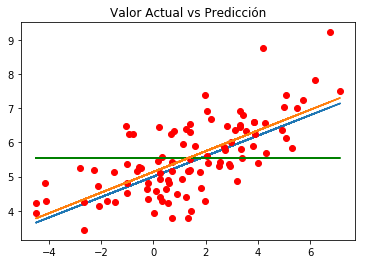

In [77]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [78]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7991467852623195

In [80]:
np.mean(data["y_actual"])

5.555709335564895

In [81]:
RSE / np.mean(data["y_actual"])

0.14384243973070698